In [363]:
import matplotlib
import numpy as np
import pandas as pd
import math

from datetime import date, datetime, time, timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# https://zhuanlan.zhihu.com/p/56507515
# https://zhuanlan.zhihu.com/p/410655154
# https://zhuanlan.zhihu.com/p/21275919
# https://developer.aliyun.com/article/1056358

In [364]:
src_path = 'indexProcessed.csv'
test_rate = 0.1               # proportion of dataset to be used as test set                   # proportion of dataset to be used as cross-validation set

test_num = 10                 # test number
                    

In [365]:
df = pd.read_csv(src_path, sep = ",")
# df = df.drop(df.columns[[0]], axis = 1)
display(df)

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013
...,...,...,...,...,...,...,...,...,...
104219,J203.JO,2021-05-25,66054.921880,66812.453130,66022.976560,66076.679690,66076.679690,0.0,4625.367578
104220,J203.JO,2021-05-26,66076.679690,66446.367190,66030.351560,66108.226560,66108.226560,0.0,4627.575859
104221,J203.JO,2021-05-27,66108.226560,66940.250000,66102.546880,66940.250000,66940.250000,0.0,4685.817500
104222,J203.JO,2021-05-28,66940.250000,67726.562500,66794.609380,67554.859380,67554.859380,0.0,4728.840157


In [366]:
# Convert Date column to datetime
df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]

# Get month of each sample
# df['month'] = df['date'].dt.month

# # Sort by datetime
# df.sort_values(by='date', inplace=True, ascending=True)

df.head(10)

/tmp/ipykernel_835616/1106858361.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')


,index,date,open,high,low,close,adj_close,volume,closeusd
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013
5,HSI,1987-01-08,2603.300049,2603.300049,2603.300049,2603.300049,2603.300049,0.0,338.429006
6,HSI,1987-01-09,2561.699951,2561.699951,2561.699951,2561.699951,2561.699951,0.0,333.020994
7,HSI,1987-01-12,2614.899902,2614.899902,2614.899902,2614.899902,2614.899902,0.0,339.936987
8,HSI,1987-01-13,2590.800049,2590.800049,2590.800049,2590.800049,2590.800049,0.0,336.804006
9,HSI,1987-01-14,2578.199951,2578.199951,2578.199951,2578.199951,2578.199951,0.0,335.165994


In [367]:
index, times = print(df['index'][0]), 0
change_index = []
print(type(df))
for i in df['index']:
    if i != index:
        print(i, times)
        change_index.append(times)
        index = i
    times += 1
print(change_index, len(change_index))
# print(df[0: 2])
# print(df.iloc[0: 2])

HSI
<class 'pandas.core.frame.DataFrame'>
HSI 0
NYA 8492
IXIC 22439
000001.SS 35129
N225 40920
N100 54794
399001.SZ 60268
GSPTSE 66028
NSEI 76554
GDAXI 79900
SSMI 88338
TWII 96009
J203.JO 101878
[0, 8492, 22439, 35129, 40920, 54794, 60268, 66028, 76554, 79900, 88338, 96009, 101878] 13


In [368]:
# print(df[0: 2])
# print(df.iloc[0: 2])
# print(df.loc[10000, 'index'])
# df.loc[df['index'] == 'HSI'] # copy dataframe with case
# print(df.iloc[len(df) - 1: len(df)]) # find last index
# print(df.adj_close.shift(-2))
df.head(8495)

,index,date,open,high,low,close,adj_close,volume,closeusd
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.000000e+00,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.000000e+00,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.000000e+00,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.000000e+00,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.000000e+00,338.923013
...,...,...,...,...,...,...,...,...,...
8490,HSI,2021-05-28,29219.460940,29336.130860,29033.720700,29124.410160,29124.410160,2.591560e+09,3786.173321
8491,HSI,2021-05-31,29225.460940,29225.460940,28909.519530,29151.800780,29151.800780,2.188581e+09,3789.734101
8492,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00,528.690002
8493,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00,527.210022


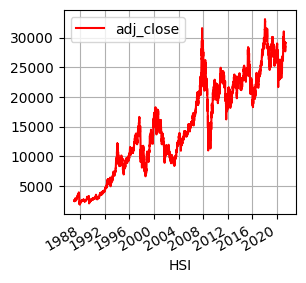

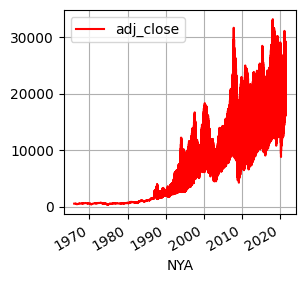

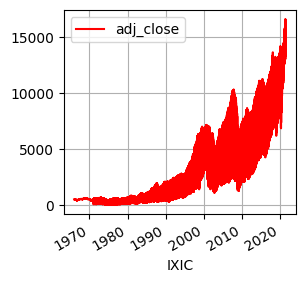

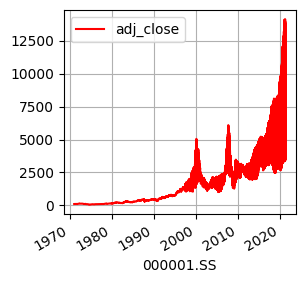

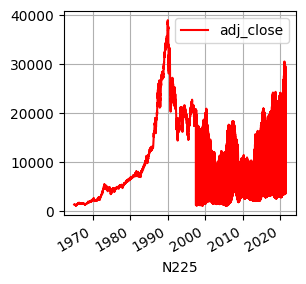

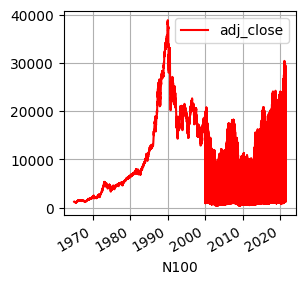

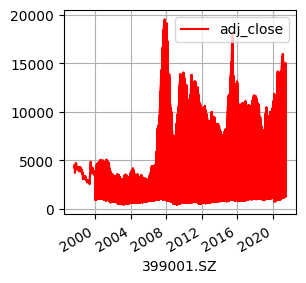

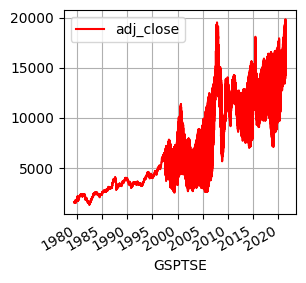

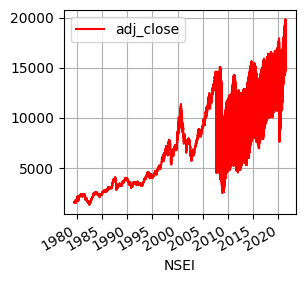

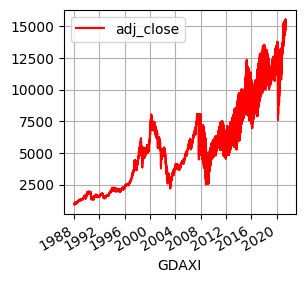

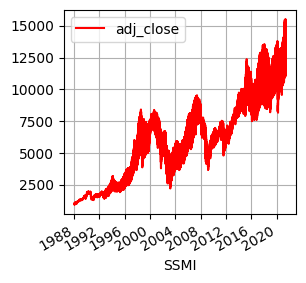

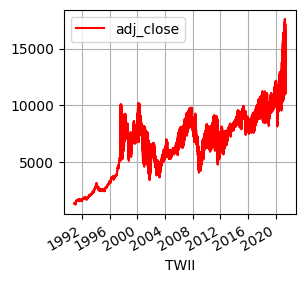

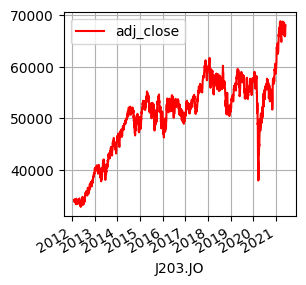

In [369]:
# ax = matplotlib.pyplot.subplots(4, 4)
rcParams['figure.figsize'] = 3, 3

index, times = 0, 0

while times < len(change_index):
        if times == 0:
                ax = df.iloc[: change_index[times + 1]].plot(x = 'date', y = 'adj_close', style = 'r-', grid = True)
                index = change_index[times]
                ax.set_xlabel(df['index'][change_index[times]])
                times += 1
                continue

        elif times == len(change_index) - 1:
                ax = df.iloc[change_index[times]:].plot(x = 'date', y = 'adj_close', style = 'r-', grid = True)
                ax.set_xlabel(df['index'][change_index[times]])
                break

        else:
                ax = df.iloc[index: change_index[times + 1]].plot(x = 'date', y = 'adj_close', style = 'r-', grid = True)
                index = change_index[times]
                ax.set_xlabel(df['index'][change_index[times]])
                times += 1


In [372]:
def wash_data(X, test_rate):
    num_test = int(test_rate * len(X))
    num_train = len(X) - num_test

    X_train, Y_train = X[:num_train], X[:num_train].adj_close
    X_test, Y_test = X[num_train:], X[num_train:].adj_close

    date_val = X_test['date']

    X_train = X_train[['high', 'low', 'close', 'volume']]
    X_test = X_test[['high', 'low', 'close', 'volume']]

    Y_train.shift(-1).fillna(Y_train.mean()) # make data to predict next day price

    X_train = X_train.shift(1).fillna(X_train.mean())

    X_test = X_test.shift(1).fillna(X_test.mean())

    Y_test = Y_test.shift(-1).fillna(Y_test.mean())

    return X_train, Y_train, X_test, Y_test, date_val

## regression switch fuction (linear, polynomial and Losso)

In [373]:
def regression_mode(X, test_rate, mode):

    from sklearn import linear_model
    from sklearn.preprocessing import PolynomialFeatures
    
    # print(X)
    X_train, Y_train, X_test, Y_test, date_val = wash_data(X, test_rate)

    if mode == 'linear':
        regression = linear_model.LinearRegression()
        regression.fit(X_train, Y_train)
        print(pd.DataFrame(regression.coef_.T, X_train.columns, columns = ['Coefficient']))
        print(regression.intercept_)
        Y_pred = regression.predict(X_test)
        print("Coefficients: \n", regression.coef_)

    elif mode == 'polynomial':
        regression = PolynomialFeatures(degree = 2)
        x_poly = regression.fit_transform(X_train)
        model = linear_model.LinearRegression()
        model.fit(x_poly, Y_train)
        Y_pred = model.predict(regression.fit_transform(X_test))

    else: 
        # Lasso
        # from sklearn.linear_model import Lasso, LassoCV
        regression = linear_model.Lasso(alpha = 5)
        regression.fit(X_train, Y_train)
        print(pd.DataFrame(regression.coef_.T, X_train.columns, columns = ['Coefficient']))
        print(regression.intercept_)
        Y_pred = regression.predict(X_test)
        print("Coefficients: \n", regression.coef_)
            

    from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, median_absolute_error
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))
    print("explained_variance_score: %.2f" % explained_variance_score(Y_test, Y_pred))
    mae = median_absolute_error(Y_test, Y_pred)
    print("Mae: %.2f" % mae)

    ax = matplotlib.pyplot.subplots(1, 1)
    rcParams['figure.figsize'] = 8,4
    ax = plt.scatter(date_val, Y_test, color="blue", marker = '.')
    bx = plt.plot(date_val, Y_pred, color="red")

0
         Coefficient
high    7.802818e-03
low    -7.120371e-02
close   1.061398e+00
volume  1.177494e-08
13.430150016058178
Coefficients: 
 [ 7.80281839e-03 -7.12037051e-02  1.06139787e+00  1.17749399e-08]
Mean squared error: 224496.63
Coefficient of determination: 0.95
explained_variance_score: 0.95
Mae: 302.86
1
         Coefficient
high    5.881149e-02
low    -2.180975e-02
close   9.619383e-01
volume -4.123857e-11
4.662272496467267
Coefficients: 
 [ 5.88114895e-02 -2.18097538e-02  9.61938266e-01 -4.12385656e-11]
Mean squared error: 41391.75
Coefficient of determination: 0.99
explained_variance_score: 0.99
Mae: 71.40
2
         Coefficient
high    1.264434e-01
low     5.350723e-02
close   8.193561e-01
volume -4.297212e-10
1.6474817680609704
Coefficients: 
 [ 1.26443444e-01  5.35072328e-02  8.19356112e-01 -4.29721162e-10]
Mean squared error: 40030.38
Coefficient of determination: 0.99
explained_variance_score: 0.99
Mae: 42.70
3
         Coefficient
high    1.491234e-01
low    -1.287

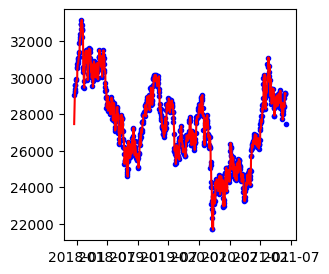

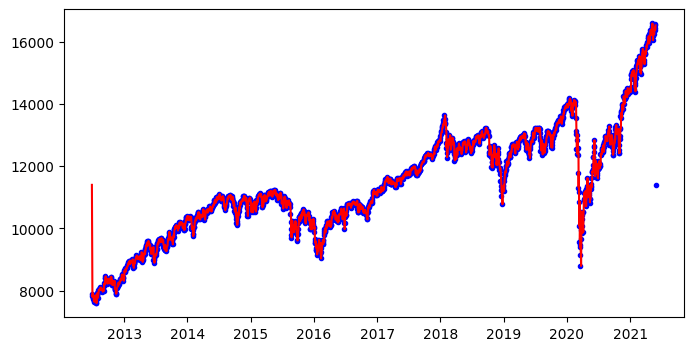

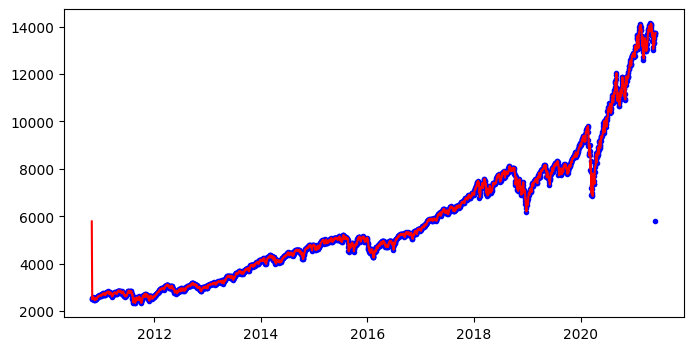

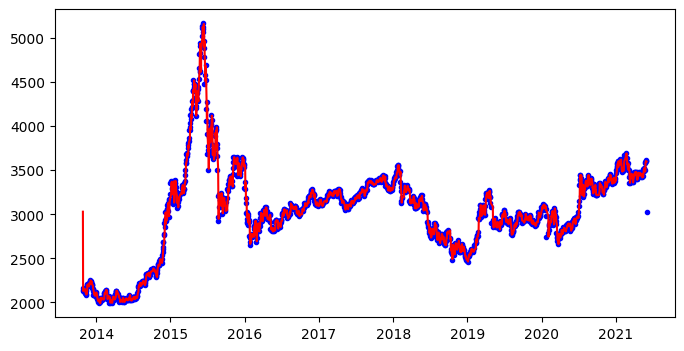

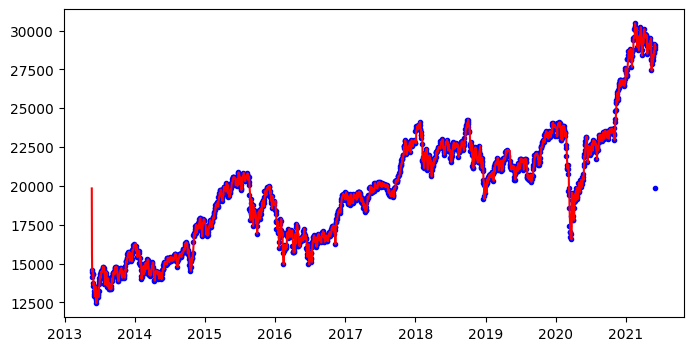

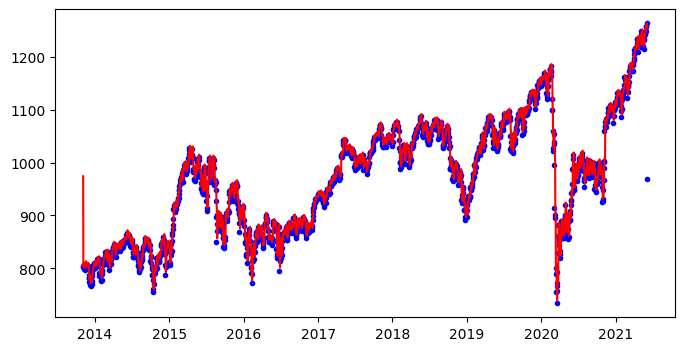

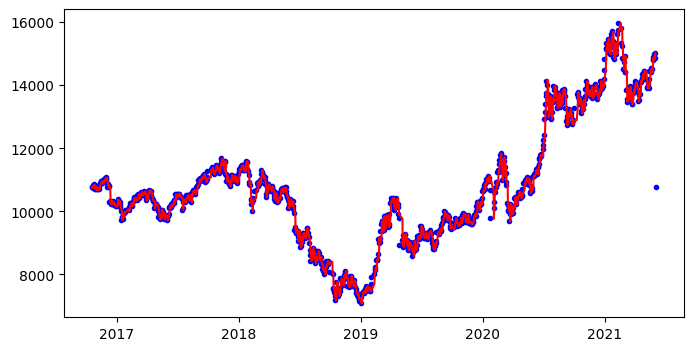

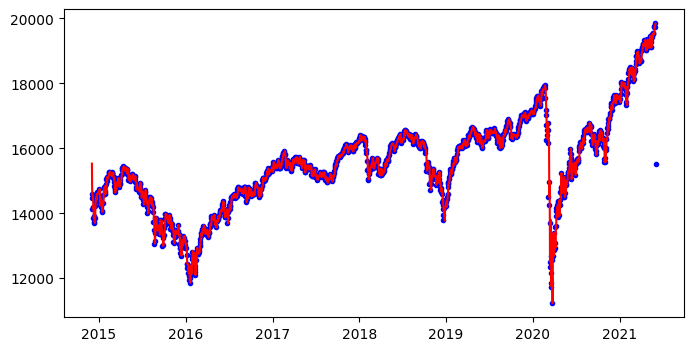

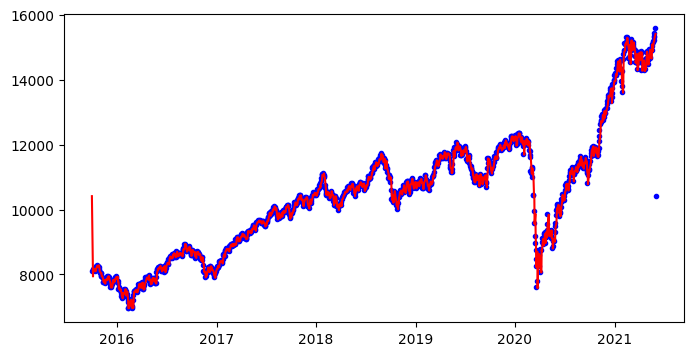

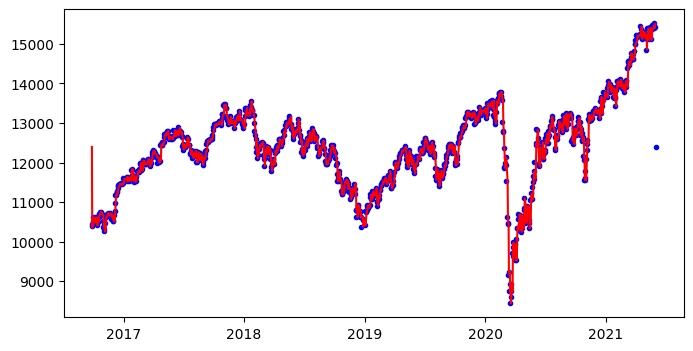

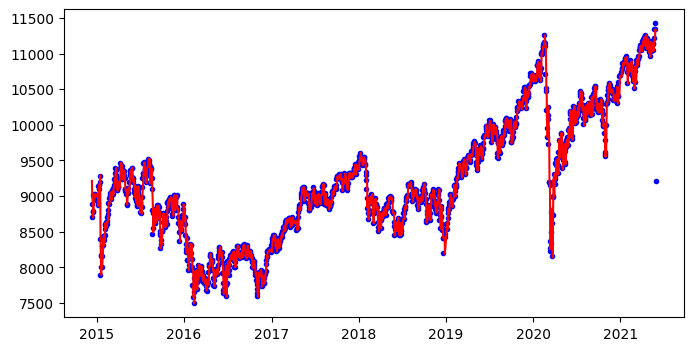

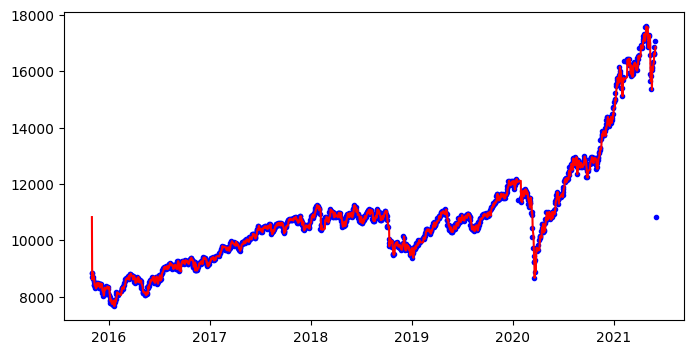

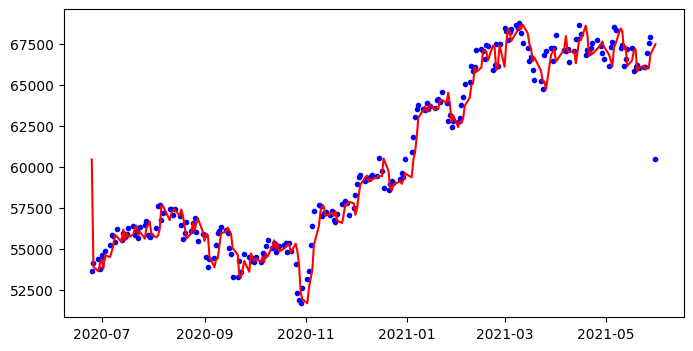

In [374]:
index, times = 0, 0
model = 'linear'

# regression_mode(df[:change_index[1]], test_rate, 'linear')

while times < len(change_index):
        print(times)
        if times == 0:
                regression_mode(df[:change_index[times + 1]], test_rate, model)
                index = change_index[times]
                times += 1
                continue

        elif times == len(change_index) - 1:
                regression_mode(df[change_index[times]:], test_rate, model)
                break

        else:
                regression_mode(df[index: change_index[times + 1]], test_rate, model)
                index = change_index[times]
                times += 1


## linear regression

In [375]:
# # X_train = X_train.drop(index = 85883) # del extra data to predict the next day 
# # Y_train = Y_train.drop(index = 40920)
# # # X_test = X_test.drop(index = 54793)
# # # Y_test = Y_test.drop(index = 101091)

# date_val = X_test['date']

# # #del X_train['adj_close']

# X_train = X_train[['high', 'low', 'close', 'volume', 'closeusd']]
# X_test = X_test[['high', 'low', 'close', 'volume', 'closeusd']]
# # X_train = X_train[np.log10(['high', 'low', 'close', 'volume', 'closeusd'])]

# mean = Y_train.mean()
# print(mean)
# Y_train = Y_train.fillna(mean, inplace = False) 

# mean = X_train.mean()
# X_train = X_train.fillna(mean, inplace = False) 

# # mean = X_test.mean()
# # X_test = X_test.fillna(mean, inplace=False) 

# # mean = Y_test.mean()
# # Y_test = Y_test.fillna(mean, inplace=False) 

In [376]:
# # from sklearn import linear_model
# # reg = linear_model.Ridge(alpha=.5)
# # # score = get_score(X_train, y_train)
# # reg.fit(X_train, Y_train)
# # reg.coef_
# # reg.intercept_

# from sklearn import linear_model
# regr = linear_model.LinearRegression()

# # Train the model using the training sets
# regr.fit(X_train, Y_train)

# print(pd.DataFrame(regr.coef_.T, X_train.columns, columns = ['Coefficient']))
# print(regr.intercept_)

# Y_pred = regr.predict(X_test)

In [377]:
# from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, median_absolute_error

# # The coefficients
# print("Coefficients: \n", regr.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))
# print("explained_variance_score: %.2f" % explained_variance_score(Y_test, Y_pred))
# mae = median_absolute_error(Y_test, Y_pred)
# print("Mae: %.2f" % mae)

# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(regr, X_test, Y_test, cv=5)
# print(scores)

In [378]:
# print(Y_pred)
# print(Y_test)
# ax = plt.scatter(date_val, Y_test, color="blue", marker = '+')
# bx = plt.scatter(date_val, Y_pred, color="red", marker = '.')
# plt.show()

In [379]:
# times = 0
# diff = 0
# for i in Y_test:
#     if int(i) != int(Y_pred[times]):
#         print("different", i, Y_pred[times])
#         if (int(i) - int(Y_pred[times]) >= 1):
#             diff += 1
#             # print("different", i, Y_pred[times])
#     times += 1
# print(diff, "%.2f%%" % (diff / len(Y_pred)))

## Lasso

In [380]:
# from sklearn.linear_model import Lasso, LassoCV
# lasso_model = Lasso(alpha = 5)
# lasso_model.fit(X_train, Y_train)

In [381]:
# print(pd.DataFrame(lasso_model.coef_.T, X_train.columns, columns = ['Coefficient']))
# print(lasso_model.intercept_)

In [382]:
# y_pred = lasso_model.predict(X_test)
# print(y_pred)
# print(Y_pred)

In [383]:
# # The coefficients
# print("Coefficients: \n", regr.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred))
# print("explained_variance_score: %.2f" % explained_variance_score(Y_test, y_pred))
# mae = median_absolute_error(Y_test, Y_pred)
# print("Mae: %.2f" % mae)

# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(regr, X_test, Y_test, cv=5)
# print(scores)

In [384]:
# print(Y_pred)
# print(Y_test)
# ax = plt.scatter(date_val, Y_test, color="blue", marker = '+')
# bx = plt.scatter(date_val, y_pred, color="red", marker = '.')
# plt.show()

## Polynomial regression:

In [385]:
# from sklearn.preprocessing import PolynomialFeatures

# poly_reg = PolynomialFeatures(degree = 2)

# x_poly = poly_reg.fit_transform(X_train)
# print(x_poly)
# model = linear_model.LinearRegression()
# model.fit(x_poly, Y_train)


In [386]:
# # print(pd.DataFrame(model.coef_.T, X_train.columns, columns = ['Coefficient']))
# # print(pd.DataFrame(model.coef_.T))
# print(model.intercept_)

In [387]:
# y_pred_ph = model.predict(poly_reg.fit_transform(X_test))
# print(y_pred_ph)
# print(Y_pred)

In [388]:
# # The coefficients
# print("Coefficients: \n", regr.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred_ph))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred_ph))
# print("explained_variance_score: %.2f" % explained_variance_score(Y_test, y_pred_ph))
# mae = median_absolute_error(Y_test, y_pred_ph)
# print("Mae: %.2f" % mae)

In [389]:
# print(y_pred_ph)
# print(Y_test)
# ax = plt.scatter(date_val, Y_test, color="blue", marker = '+')
# bx = plt.scatter(date_val, y_pred_ph, color="red", marker = '.')
# plt.show()